<a href="https://www.kaggle.com/code/simonflora/philippines-dengue-cases-time-series-forcasting?scriptVersionId=253072839" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.dates as mdates

import warnings
warnings.filterwarnings("ignore")

# Data

In [2]:
path = '/kaggle/input/dengue-cases-in-the-philippines/ph_dengue_cases2016-2020.csv'
df = pd.read_csv(path)
df['Date'] = pd.to_datetime("01-"+df['Month'].astype(str)+"-"+df['Year'].astype(str))
df.set_index('Date', inplace=True)
df.rename(columns={'Dengue_Cases': 'Cases', 'Dengue_Deaths': 'Deaths'}, inplace=True)
df = df[df.index.year != 2020]
df.head()

,Month,Year,Region,Cases,Deaths
Date,,,,,
2016-01-01,January,2016,Region I,705,1
2016-02-01,February,2016,Region I,374,0
2016-03-01,March,2016,Region I,276,0
2016-04-01,April,2016,Region I,240,2
2016-05-01,May,2016,Region I,243,1


In [3]:
df.tail()

,Month,Year,Region,Cases,Deaths
Date,,,,,
2019-08-01,August,2019,BARMM,811,6
2019-09-01,September,2019,BARMM,807,2
2019-10-01,October,2019,BARMM,481,2
2019-11-01,November,2019,BARMM,362,0
2019-12-01,December,2019,BARMM,288,3


# Exploratory Data Analysis (EDA)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 816 entries, 2016-01-01 to 2019-12-01
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Month   816 non-null    object
 1   Year    816 non-null    int64 
 2   Region  816 non-null    object
 3   Cases   816 non-null    int64 
 4   Deaths  816 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 38.2+ KB


In [5]:
print(df.index)

DatetimeIndex(['2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
               '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01',
               '2016-09-01', '2016-10-01',
               ...
               '2019-03-01', '2019-04-01', '2019-05-01', '2019-06-01',
               '2019-07-01', '2019-08-01', '2019-09-01', '2019-10-01',
               '2019-11-01', '2019-12-01'],
              dtype='datetime64[ns]', name='Date', length=816, freq=None)


In [6]:
df.describe()

,Year,Cases,Deaths
count,816.00000,816.000000,816.000000
mean,2017.50000,1294.588235,19.177696
std,1.11872,1792.782843,107.063110
min,2016.00000,17.000000,0.000000
25%,2016.75000,333.250000,1.000000
50%,2017.50000,716.000000,4.000000
75%,2018.25000,1578.250000,8.000000
max,2019.00000,21658.000000,1651.000000


In [7]:
df.shape

(816, 5)

In [8]:
df.isnull().sum()

Month     0
Year      0
Region    0
Cases     0
Deaths    0
dtype: int64

In [9]:
df['Region'].unique().tolist()

['Region I',
 'Region II',
 'Region III',
 'Region IV-A',
 'Region IV-B',
 'Region V',
 'Region VI',
 'Region VII',
 'Region VIII',
 'Region IX',
 'Region X',
 'Region XI',
 'Region XII',
 'Region XIII',
 'NCR',
 'CAR',
 'BARMM']

In [10]:
df['Region'].value_counts()

Region
Region I       48
Region IX      48
CAR            48
NCR            48
Region XIII    48
Region XII     48
Region XI      48
Region X       48
Region VIII    48
Region II      48
Region VII     48
Region VI      48
Region V       48
Region IV-B    48
Region IV-A    48
Region III     48
BARMM          48
Name: count, dtype: int64

In [11]:
df['Year'].unique().tolist()

[2016, 2017, 2018, 2019]

In [12]:
df.groupby('Year')['Cases'].sum()

Year
2016    209544
2017    154155
2018    250783
2019    441902
Name: Cases, dtype: int64

# Visualization

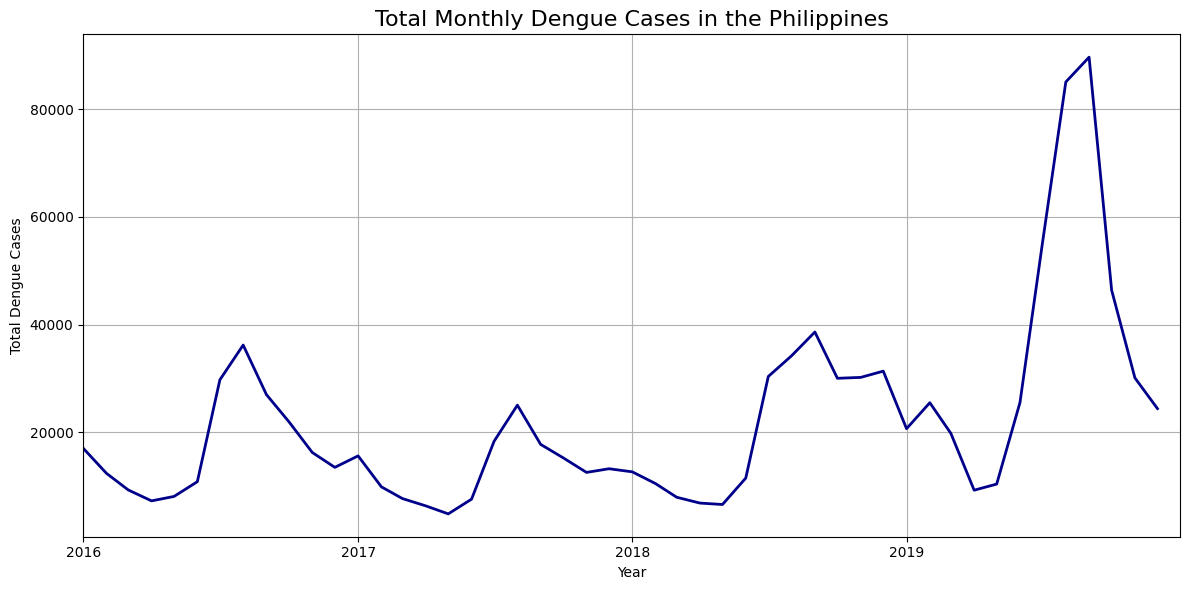

In [13]:
total_cases = df.groupby('Date')['Cases'].sum()

plt.figure(figsize=(12, 6))
plt.plot(total_cases.index, total_cases.values, color='darkblue', linewidth=2)
plt.title('Total Monthly Dengue Cases in the Philippines', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Total Dengue Cases')
plt.grid(True)

plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xlim(pd.to_datetime('2016-01-01'), pd.to_datetime('2019-12-31'))

plt.tight_layout()
plt.show()


In [14]:
#sns.lineplot(data=total_df, x=total_df.index, y=total_df.Cases)

# Checking Stationarity

## Rolling Statistics

In [15]:
total_cases = df.groupby('Date')['Cases'].sum().sort_index()
total_df = pd.DataFrame({'Cases': total_cases})

In [16]:
total_df['rollMean'] = total_df['Cases'].rolling(window=12).mean()
total_df['rollStd'] = total_df['Cases'].rolling(window=12).std()

<Axes: xlabel='Date', ylabel='Cases'>

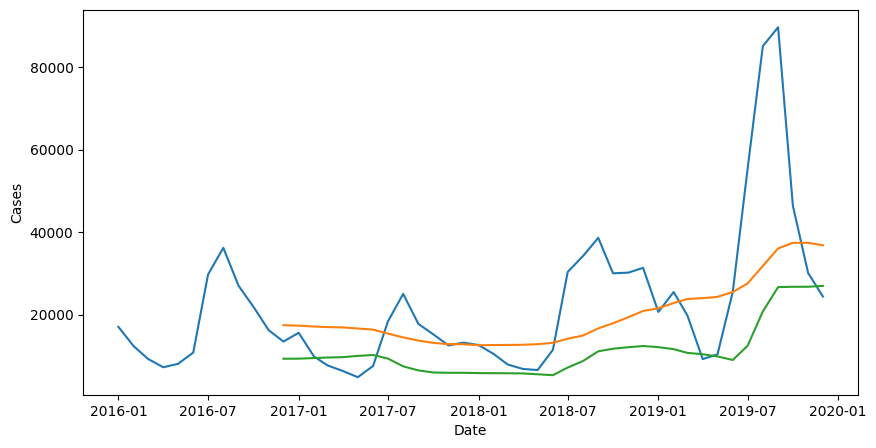

In [17]:
plt.figure(figsize=(10,5))
sns.lineplot(data=total_df, x=total_df.index, y=total_df.Cases)
sns.lineplot(data=total_df, x=total_df.index, y=total_df.rollMean)
sns.lineplot(data=total_df, x=total_df.index, y=total_df.rollStd)

## ADF Test

In [18]:
from statsmodels.tsa.stattools import adfuller

In [19]:
adfTest = adfuller(total_df['Cases'], autolag='AIC')

In [20]:
adfTest

(1.8160752036464056,
 0.9983803724142285,
 10,
 37,
 {'1%': -3.6209175221605827,
  '5%': -2.9435394610388332,
  '10%': -2.6104002410518627},
 780.79223973291)

In [21]:
stats = pd.Series(adfTest[0:4],index=['Test Statistics','p-value','#lags used', '# of observations used'])
stats

Test Statistics            1.816075
p-value                    0.998380
#lags used                10.000000
# of observations used    37.000000
dtype: float64

In [22]:
for key, values in adfTest[4].items():
    print('criticality',key,":",values)

criticality 1% : -3.6209175221605827
criticality 5% : -2.9435394610388332
criticality 10% : -2.6104002410518627


- Critical values are lower than 'Test Statistics' therefor the data is NOT STATIONARY

# Making Data Stationary

## Time Shift

In [23]:
 def test_stationarity(dataFrame, var):
     dataFrame['rollMean'] = dataFrame[var].rolling(window=12).mean()
     dataFrame['rollStd'] = dataFrame[var].rolling(window=12).std()

     from statsmodels.tsa.stattools import adfuller
     adfTest = adfuller(dataFrame[var],autolag='AIC')
     stats = pd.Series(adfTest[0:4],index=['Test Statistics', 'p-value', '#lags used', '# of observations used'])
     print(stats)

     for key,values in adfTest[4].items():
         print('criticality',key,":",values)

     sns.lineplot(data=dataFrame, x=dataFrame.index, y=var)
     sns.lineplot(data=dataFrame, x=dataFrame.index, y='rollMean')
     sns.lineplot(data=dataFrame, x=dataFrame.index, y='rollStd')

In [24]:
air_df = total_df[['Cases']]
air_df.head()

,Cases
Date,
2016-01-01,17052
2016-02-01,12386
2016-03-01,9300
2016-04-01,7269
2016-05-01,8092


In [25]:
air_df['shift'] = air_df.Cases.shift()
air_df['shiftDiff'] = air_df.Cases - air_df['shift']
air_df.head()

,Cases,shift,shiftDiff
Date,,,
2016-01-01,17052,NaN,NaN
2016-02-01,12386,17052.0,-4666.0
2016-03-01,9300,12386.0,-3086.0
2016-04-01,7269,9300.0,-2031.0
2016-05-01,8092,7269.0,823.0


Test Statistics           -2.438719
p-value                    0.131105
#lags used                10.000000
# of observations used    36.000000
dtype: float64
criticality 1% : -3.626651907578875
criticality 5% : -2.9459512825788754
criticality 10% : -2.6116707716049383


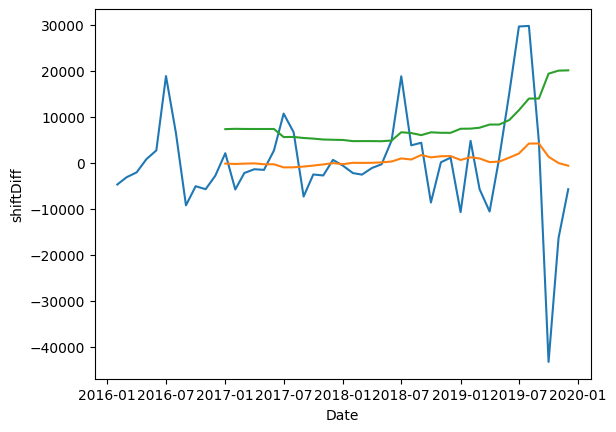

In [26]:
test_stationarity(air_df.dropna(), 'shiftDiff')

## Log Transformation

In [27]:
log_df = total_df[['Cases']]
log_df['log'] = np.log(log_df['Cases'])
log_df.head()

,Cases,log
Date,,
2016-01-01,17052,9.744023
2016-02-01,12386,9.424322
2016-03-01,9300,9.137770
2016-04-01,7269,8.891374
2016-05-01,8092,8.998631


Test Statistics            0.942949
p-value                    0.993626
#lags used                10.000000
# of observations used    37.000000
dtype: float64
criticality 1% : -3.6209175221605827
criticality 5% : -2.9435394610388332
criticality 10% : -2.6104002410518627


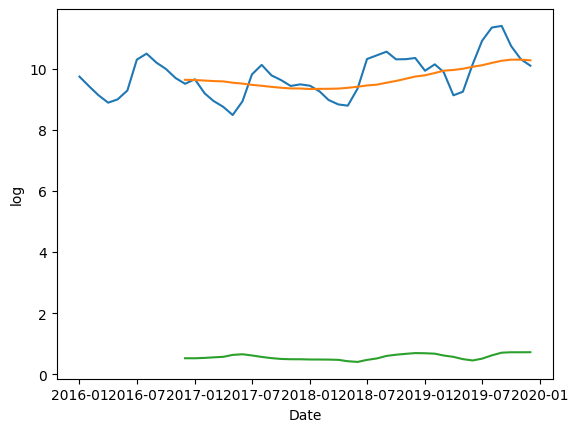

In [28]:
test_stationarity(log_df,'log')

## SQRT

In [29]:
sqrt_df = total_df[['Cases']]
sqrt_df['sqrt'] = np.sqrt(total_df['Cases'])
sqrt_df.head()

,Cases,sqrt
Date,,
2016-01-01,17052,130.583307
2016-02-01,12386,111.292408
2016-03-01,9300,96.436508
2016-04-01,7269,85.258431
2016-05-01,8092,89.955545


Test Statistics            1.274209
p-value                    0.996461
#lags used                10.000000
# of observations used    37.000000
dtype: float64
criticality 1% : -3.6209175221605827
criticality 5% : -2.9435394610388332
criticality 10% : -2.6104002410518627


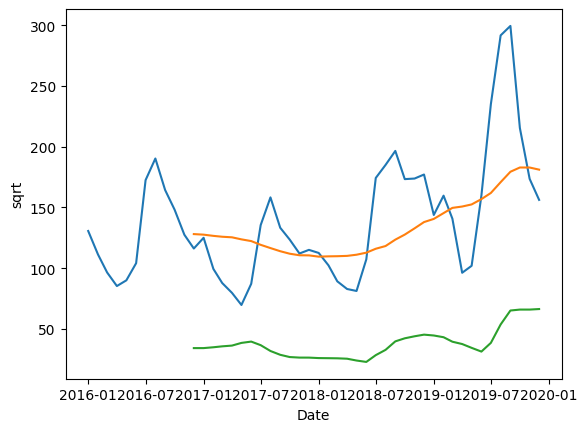

In [30]:
test_stationarity(sqrt_df, 'sqrt')

## CUBE ROOT

In [31]:
cbrt_df = total_df[['Cases']]
cbrt_df['cbrt'] = np.cbrt(cbrt_df['Cases'])
cbrt_df.head()

,Cases,cbrt
Date,,
2016-01-01,17052,25.739006
2016-02-01,12386,23.137176
2016-03-01,9300,21.029437
2016-04-01,7269,19.371276
2016-05-01,8092,20.076375


Test Statistics            1.132557
p-value                    0.995485
#lags used                10.000000
# of observations used    37.000000
dtype: float64
criticality 1% : -3.6209175221605827
criticality 5% : -2.9435394610388332
criticality 10% : -2.6104002410518627


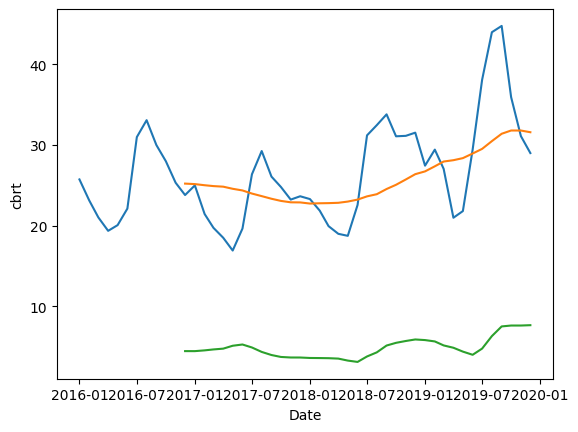

In [32]:
test_stationarity(cbrt_df, 'cbrt')

## LOG & SQRT

In [33]:
log_df2 = log_df[['Cases','log']]
log_df2['log_sqrt'] = np.sqrt(log_df2['log'])
log_df2.head()

,Cases,log,log_sqrt
Date,,,
2016-01-01,17052,9.744023,3.121542
2016-02-01,12386,9.424322,3.069906
2016-03-01,9300,9.137770,3.022874
2016-04-01,7269,8.891374,2.981841
2016-05-01,8092,8.998631,2.999772


Test Statistics            0.920491
p-value                    0.993352
#lags used                10.000000
# of observations used    37.000000
dtype: float64
criticality 1% : -3.6209175221605827
criticality 5% : -2.9435394610388332
criticality 10% : -2.6104002410518627


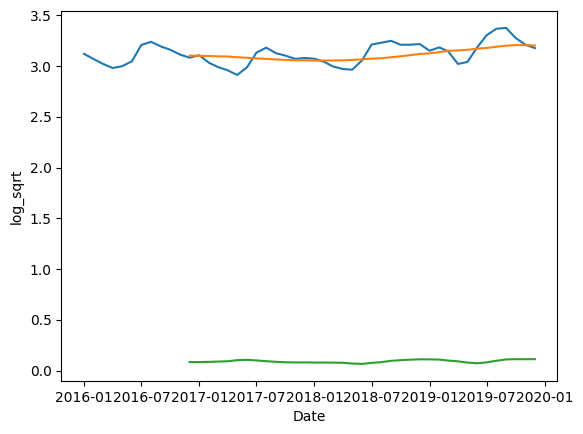

In [34]:
test_stationarity(log_df2, 'log_sqrt')

## LOG&CBRT

In [35]:
log_df2 = log_df[['Cases','log']]
log_df2['log_sqrt'] = np.sqrt(log_df2['log'])
log_df2['logShiftDiff'] = log_df2['log_sqrt'] - log_df2['log_sqrt'].shift()
log_df2.head()

,Cases,log,log_sqrt,logShiftDiff
Date,,,,
2016-01-01,17052,9.744023,3.121542,NaN
2016-02-01,12386,9.424322,3.069906,-0.051636
2016-03-01,9300,9.137770,3.022874,-0.047031
2016-04-01,7269,8.891374,2.981841,-0.041034
2016-05-01,8092,8.998631,2.999772,0.017931


Test Statistics           -2.439342
p-value                    0.130939
#lags used                10.000000
# of observations used    36.000000
dtype: float64
criticality 1% : -3.626651907578875
criticality 5% : -2.9459512825788754
criticality 10% : -2.6116707716049383


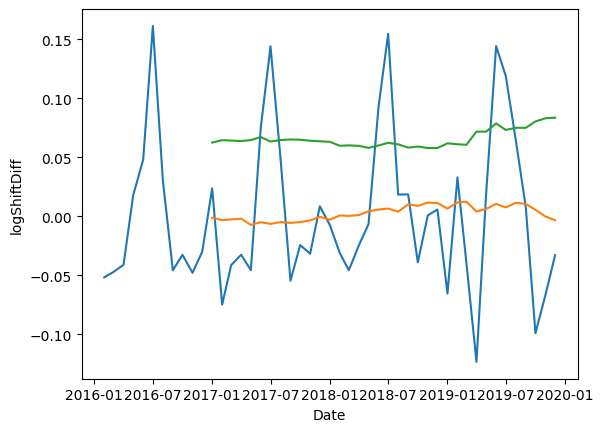

In [36]:
test_stationarity(log_df2.dropna(), 'logShiftDiff')

# Building the Model

- use the base data for the first model

In [37]:
denC = total_df[['Cases']].copy(deep=True)
denC['firstDiff'] = denC['Cases'].diff()
denC['Diff12'] = denC['Cases'].diff(12)

In [38]:
denC.head()

,Cases,firstDiff,Diff12
Date,,,
2016-01-01,17052,NaN,NaN
2016-02-01,12386,-4666.0,NaN
2016-03-01,9300,-3086.0,NaN
2016-04-01,7269,-2031.0,NaN
2016-05-01,8092,823.0,NaN


In [39]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

- Autoregressive = p, can be find using PACF

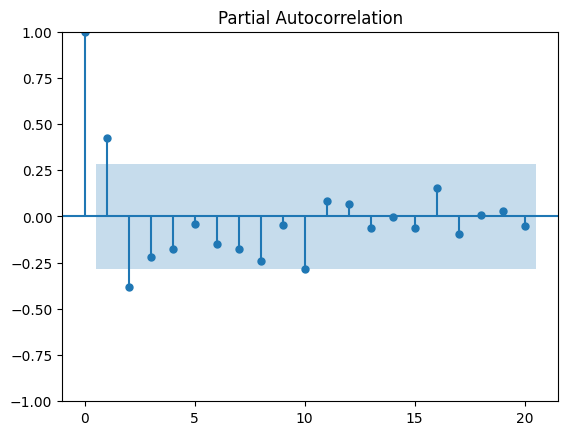

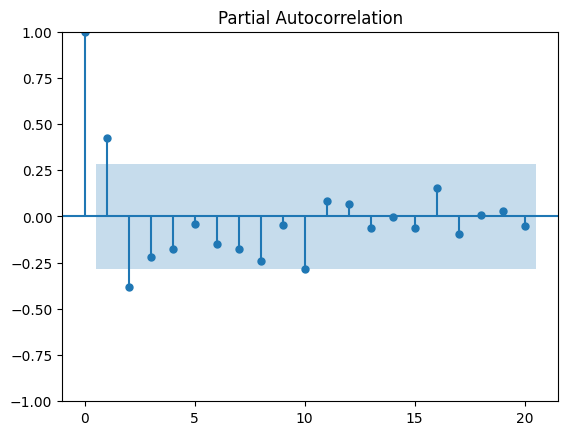

In [40]:
plot_pacf(denC['firstDiff'].dropna(), lags=20)

- Moving average = q, can be find using ACF

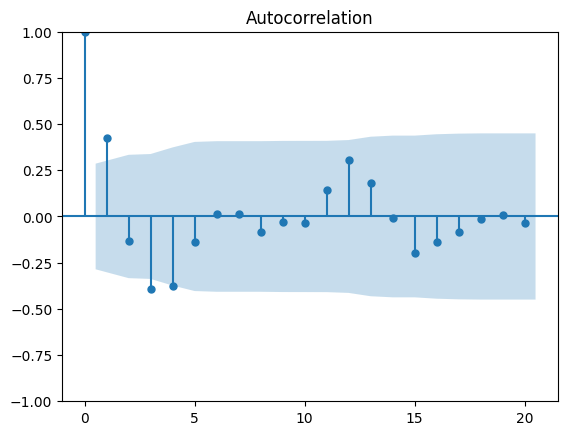

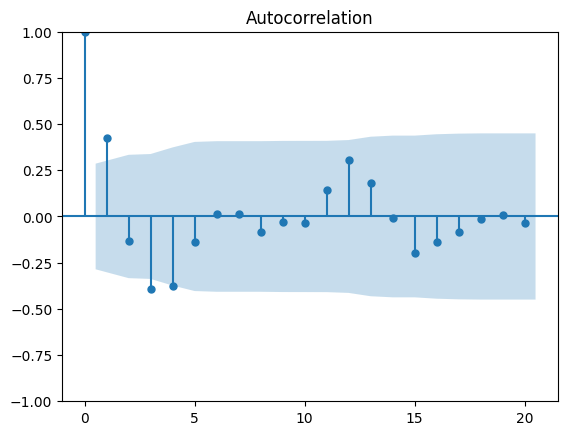

In [41]:
plot_acf(denC['firstDiff'].dropna(), lags=20)

In [42]:
train = denC[:round(len(denC)*70/100)]
test = denC[round(len(denC)*70/100):]
test.head()

,Cases,firstDiff,Diff12
Date,,,
2018-11-01,30191,165.0,17638.0
2018-12-01,31353,1162.0,18118.0
2019-01-01,20672,-10681.0,8015.0
2019-02-01,25494,4822.0,15028.0
2019-03-01,19798,-5696.0,11854.0


# SARIMAX

In [43]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

In [44]:
denC.head()

,Cases,firstDiff,Diff12
Date,,,
2016-01-01,17052,NaN,NaN
2016-02-01,12386,-4666.0,NaN
2016-03-01,9300,-3086.0,NaN
2016-04-01,7269,-2031.0,NaN
2016-05-01,8092,823.0,NaN


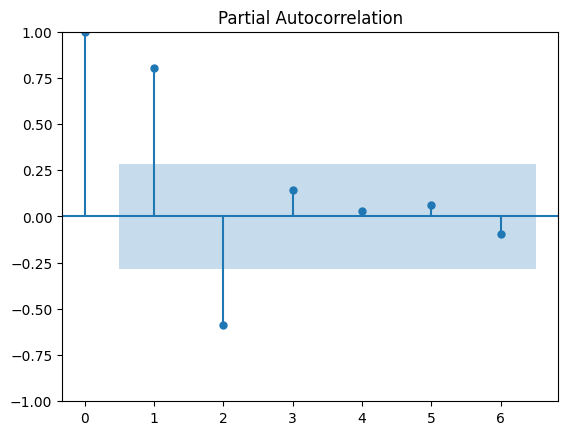

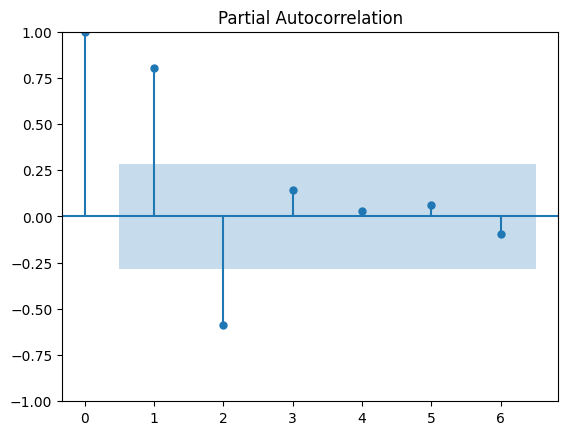

In [45]:
plot_pacf(denC['Cases'].dropna(), lags=6)

In [46]:
model = SARIMAX(train['Cases'],order=(1,1,3), seasonal_order=(1,1,3,12))
model_fit = model.fit()
prediction = model_fit.predict(start=test.index[0], end=test.index[-1])
denC['sarimaxPred'] = prediction

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [47]:
denC.tail()

,Cases,firstDiff,Diff12,sarimaxPred
Date,,,,
2019-08-01,85038,29818.0,50828.0,55481.756921
2019-09-01,89642,4604.0,51025.0,55118.424171
2019-10-01,46382,-43260.0,16356.0,46819.466552
2019-11-01,30097,-16285.0,-94.0,47659.838291
2019-12-01,24397,-5700.0,-6956.0,43207.489732


<Axes: xlabel='Date', ylabel='Cases'>

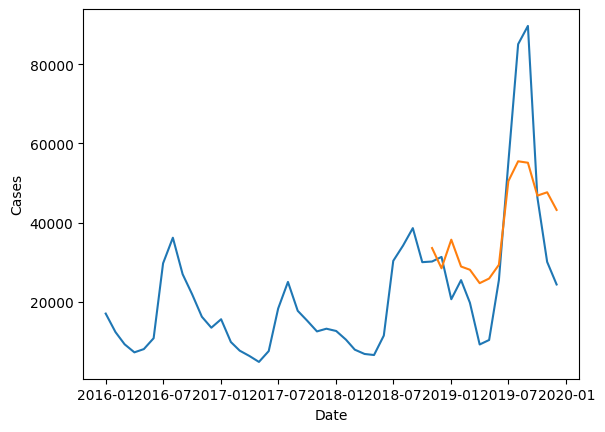

In [48]:
denC.dropna()
sns.lineplot(data=denC, x=denC.index, y='Cases')
sns.lineplot(data=denC, x=denC.index, y='sarimaxPred')

In [49]:
np.sqrt(mean_squared_error(test['Cases'],prediction))

15973.085133580902

In [50]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test['Cases'], prediction)
print("MAE:", mae)

MAE: 12393.94100913263


In [51]:
mape = np.mean(np.abs((test['Cases'] - prediction) / test['Cases'])) * 100
print("MAPE:", mape, "%")

MAPE: 49.894163475862406 %
